In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='whitegrid')
sns.set_palette('bright')
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import fftpack
import datetime
from sklearn import mixture
import warnings
warnings.filterwarnings('ignore')
from scipy import fft
from scipy import signal
import math
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum
from scipy.spatial import distance

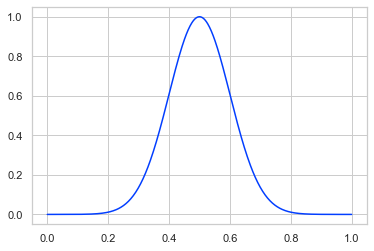

In [42]:
t = np.linspace(0, 1, 500)
s = signal.gaussian(500, std=50)
plt.plot(t, s)

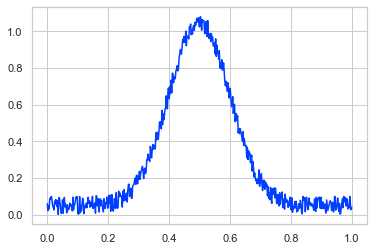

In [43]:
t2 = np.linspace(0, 1, 500)
noise = np.random.random(500)/10
s2 = s + noise
plt.plot(t2, s2)

In [44]:
from scipy.stats import wasserstein_distance

In [45]:
wasserstein_distance(s,s2)

0.05020446717204305

In [46]:
signal_1 = pd.DataFrame(zip(t,s),columns=['Time','Value'])
signal_2 = pd.DataFrame(zip(t2,s2),columns=['Time','Value'])

In [47]:
def jaccard(dff, dfj):
    a = 0
    intersect =[]
    union = []
    n1 = np.array(dff.Value)
    n2 = np.array(dfj.Value)
    n1 = np.append(n1,n2.max())
    n1 = np.append(n1,n2.min())
    n2 = np.append(n2,n1.max())
    n2 = np.append(n2,n1.min())
    count1, bin_edges1 = np.histogram(n2, bins=20)
    count2, bin_edges2 = np.histogram(n1, bins=20)

    for x in range(count1.shape[0]):
        intersect.append(min(count1[x],count2[x]))
    intersect = np.array([intersect])
    isum = intersect.sum()

    for x in range(count1.shape[0]):
        union.append(max(count1[x],count2[x]))
    union = np.array([union])
    usum = union.sum()

    jacc1 = isum/usum
            #x = wasserstein_distance(dff.value,dfj.value)
    a = jacc1
    return a

In [48]:
jaccard(signal_1,signal_2)

0.5212121212121212

# FFT - Real and Imag

In [49]:
def freq(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,yf.real),columns=['Freq','Ampli'])
    fft_data2 = pd.DataFrame(zip(f,yf.imag),columns=['Freq','Ampli'])
    return fft_data1,fft_data2

(-0.1, 0.1)

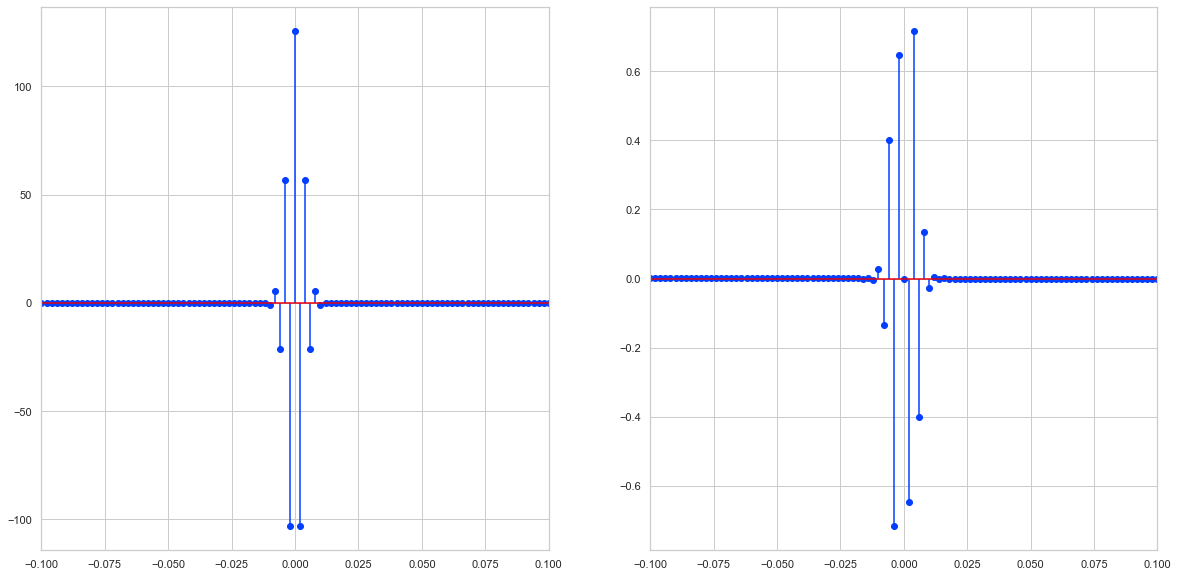

In [50]:
freq_ampli1,freq_ampli1i = freq(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

<StemContainer object of 3 artists>

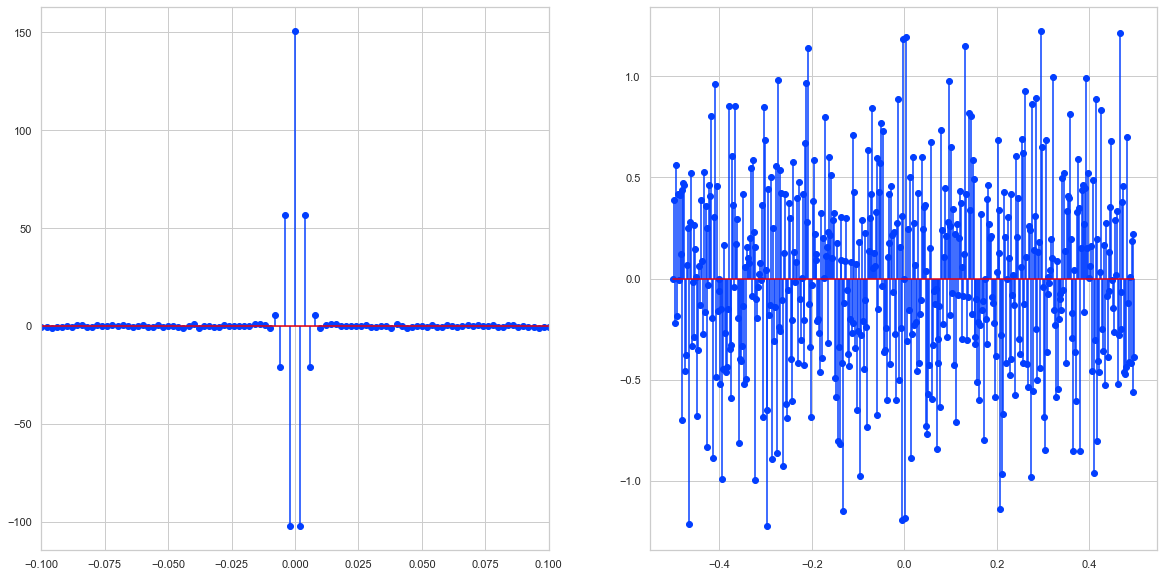

In [51]:
freq_ampli2,freq_ampli2i = freq(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

In [52]:
print("Real: ",wasserstein_distance(freq_ampli1['Ampli'], freq_ampli2['Ampli']))
print("Imaginary", wasserstein_distance(freq_ampli1i['Ampli'], freq_ampli2i['Ampli']))

Real:  0.4154383206107657
Imaginary 0.3680957399508366


In [53]:
freq_ampli1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1,freq_ampli2))
freq_ampli1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9960238568588469


In [54]:
freq_ampli1i.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli2i.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli1i,freq_ampli2i))
freq_ampli1i.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli2i.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.10816777041942605


# FFT - Magnitude and phase

In [55]:
#Func gives magnitude of FFT provide dataframe in Time Domain
def freq_mag(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data = pd.DataFrame(zip(f,np.abs(yf)),columns=['Freq','Ampli'])
    return fft_data

In [92]:
def freq_phase(df):
    N = df.shape[0]
    y = np.array(df['Value'])
    f = fftpack.fftfreq(len(y))
    yf = fftpack.fft(y)
    fft_data1 = pd.DataFrame(zip(f,np.angle(yf)),columns=['Freq','Phase'])
    return fft_data1

<StemContainer object of 3 artists>

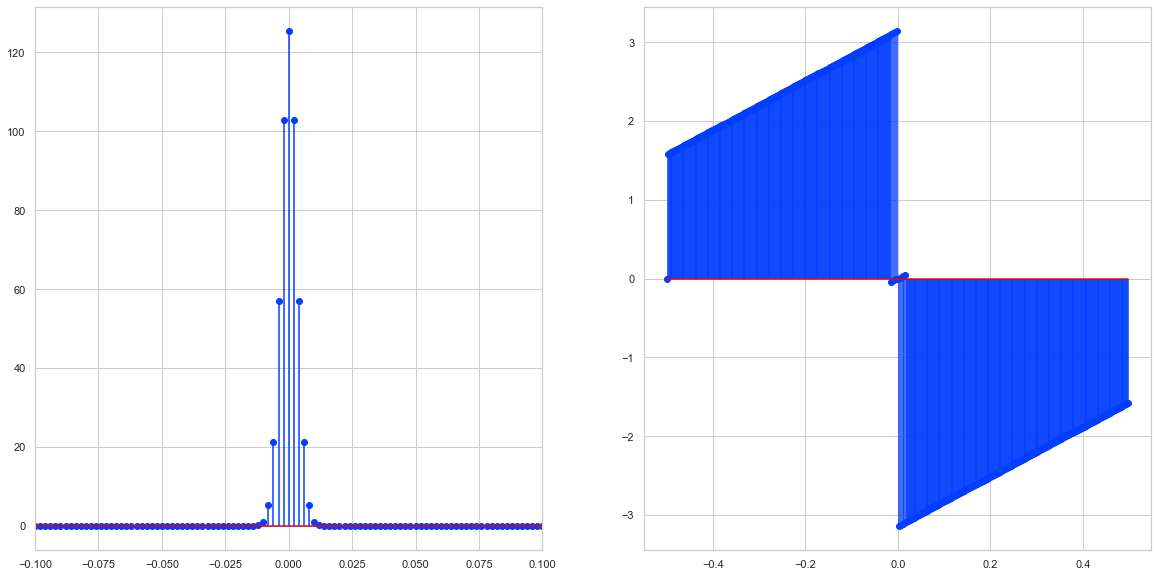

In [93]:
freq_ampli_mag1 = freq_mag(signal_1)
freq_ampli_phase1 = freq_phase(signal_1)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])

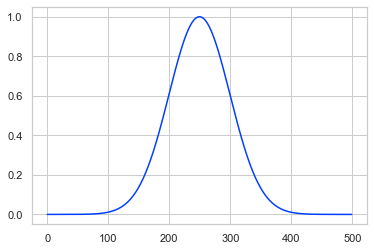

In [94]:
import math
import numpy.fft as FFT
def inverse_mag_phase(df1, df2):
    mag = df1['Ampli'].to_numpy()
    phase = df2['Phase'].to_numpy()
    for_ifft = [[] for i in range(len(mag))]
    for i in range(len(mag)):
            rl = mag[i]*math.cos(phase[i])
            im = mag[i]*math.sin(phase[i])
            for_ifft[i].append(complex(rl,im))
    ifftc = FFT.ifft2(for_ifft)
    return ifftc
ifft_mag_phase1 = inverse_mag_phase(freq_ampli_mag1, freq_ampli_phase1)
plt.plot(ifft_mag_phase1)

In [95]:
from scipy.spatial import distance
distance.euclidean(s,ifft_mag_phase1)

2.673254030430671e-15

<StemContainer object of 3 artists>

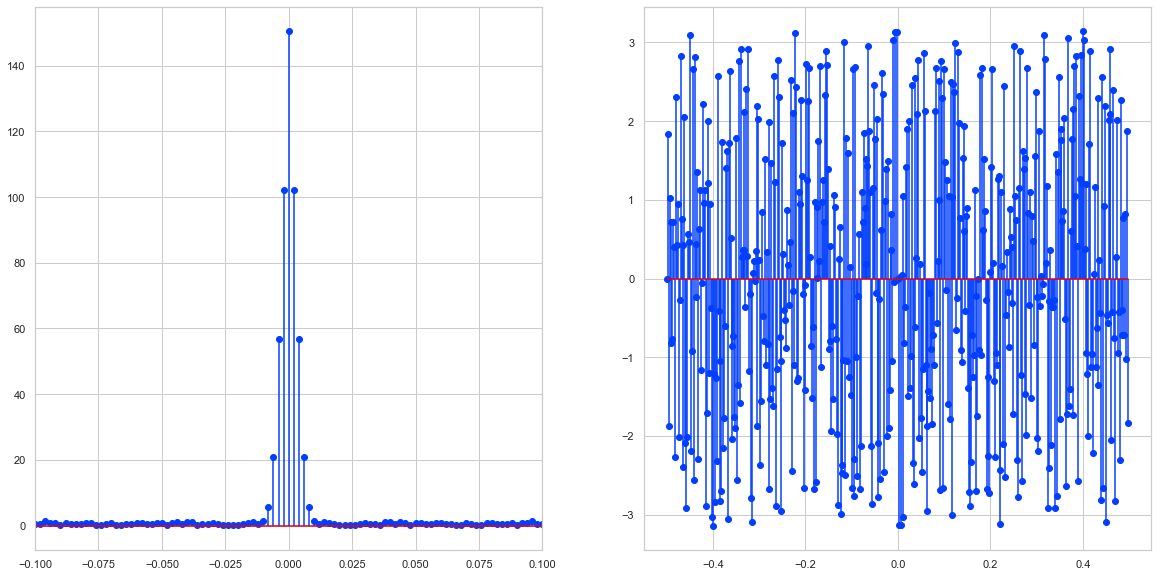

In [60]:
freq_ampli_mag2 = freq_mag(signal_2)
freq_ampli_phase2 = freq_phase(signal_2)
fig, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

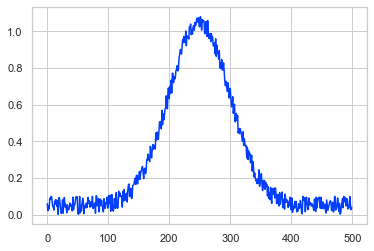

In [61]:
ifft_mag_phase2 = inverse_mag_phase(freq_ampli_mag2, freq_ampli_phase2)
plt.plot(ifft_mag_phase2)

In [62]:
distance.euclidean(s2,ifft_mag_phase2)

3.4114699467536254e-15

In [63]:
print("Magnitude: ",(wasserstein_distance(freq_ampli_mag1['Ampli'], freq_ampli_mag2['Ampli'])))
print("Phase", wasserstein_distance(freq_ampli_phase1['Phase'], freq_ampli_phase2['Phase']))

Magnitude:  0.6158781145201881
Phase 0.7705849353463816


In [64]:
freq_ampli_mag1.rename(columns = {'Ampli':'Value'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Ampli':'Value'}, inplace = True)
print(jaccard(freq_ampli_mag1,freq_ampli_mag2))
freq_ampli_mag1.rename(columns = {'Value': 'Ampli'}, inplace = True)
freq_ampli_mag2.rename(columns = {'Value': 'Ampli'}, inplace = True)

0.9960238568588469


In [65]:
freq_ampli_phase1.rename(columns = {'Phase':'Value'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Phase':'Value'}, inplace = True)
print(jaccard(freq_ampli_phase1,freq_ampli_phase2))
freq_ampli_phase1.rename(columns = {'Value': 'Phase'}, inplace = True)
freq_ampli_phase2.rename(columns = {'Value': 'Phase'}, inplace = True)

0.31758530183727035


# Cepstrum

In [66]:
from acoustics.cepstrum import complex_cepstrum
from acoustics.cepstrum import inverse_complex_cepstrum

In [67]:
duration = signal_1.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps1, _ = complex_cepstrum(signal_1['Value'])
print(ceps1)

[-1.45905452e+01  1.02522319e+01  5.18030791e+00  3.55235685e+00
  2.64538538e+00  2.18262735e+00  1.77432101e+00  1.57238194e+00
  1.31789630e+00  1.21447571e+00  1.02690862e+00  9.71179332e-01
  8.18820461e-01  7.90001270e-01  6.58694461e-01  6.46838551e-01
  5.29414538e-01  5.29244986e-01  4.21749417e-01  4.30257704e-01
  3.30369953e-01  3.45744383e-01  2.52032873e-01  2.73129561e-01
  1.84668620e-01  2.10729228e-01  1.26887988e-01  1.57379763e-01
  7.76995911e-02  1.12220560e-01  3.63411753e-02  7.45622461e-02
  2.17620638e-03  4.38053761e-02 -2.53700298e-02  1.93903980e-02
 -4.68492576e-02  7.67911621e-04 -6.28125178e-02 -1.26174595e-02
 -7.38211799e-02 -2.13338335e-02 -8.04501322e-02 -2.59622758e-02
 -8.32855274e-02 -2.70924980e-02 -8.29187926e-02 -2.53155210e-02
 -7.99382330e-02 -2.12144856e-02 -7.49192810e-02 -1.53545323e-02
 -6.84142174e-02 -8.27254127e-03 -6.09420803e-02 -4.67353233e-04
 -5.29793148e-02  7.60901910e-03 -4.49516472e-02  1.55587840e-02
 -3.72275113e-02  2.30440

In [68]:
duration = signal_2.shape[0]
fs = 1.0
samples = int(fs*duration)
t = np.arange(samples) / fs
ceps2, _ = complex_cepstrum(signal_2['Value'])
print(ceps2)

[-6.42438217e-01  4.34866688e+00 -4.33522656e+00  4.10073043e+00
  5.14867693e-01  7.85665619e-01  1.43667864e-01  6.37842910e-01
  1.01940108e+00 -1.34170651e-02  9.69099601e-01  1.04774514e-01
  5.14355652e-01  1.17925750e-01 -1.34880914e-01  4.00357720e-01
  3.78072159e-01  4.44280637e-01 -5.61036676e-02  3.72979576e-01
  6.14568301e-01  2.77776632e-01 -6.69076093e-02  5.49815664e-01
 -5.66035094e-01  2.36219285e-01  2.13664898e-02  7.13739863e-01
  1.84799844e-01  3.67862476e-01 -2.66005455e-01  1.64306680e-01
  2.52543470e-02  1.46102134e-01 -1.54086004e-02 -1.37228475e-02
  2.24847423e-01 -1.72723300e-01  1.69309578e-02  3.67926848e-01
 -5.41528159e-02 -2.89800436e-02 -1.76252504e-01 -9.80449761e-02
  1.81187572e-01 -9.89131812e-02 -1.79875891e-01 -1.19054513e-01
 -1.10316976e-01 -7.74256414e-02  2.40314843e-02 -1.47259931e-01
  2.28478102e-01  1.45126317e-01  1.34474411e-01 -1.93819659e-01
 -5.12639161e-02  7.11524489e-02 -7.66297356e-02  1.15300972e-01
 -8.78113882e-02  2.41427

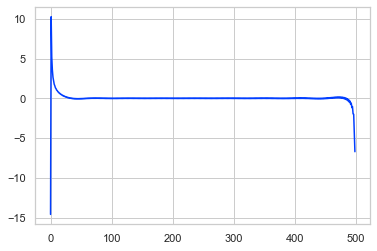

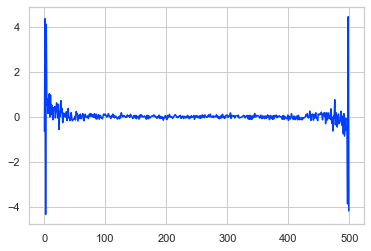

In [69]:
plt.plot(ceps1)
plt.show()
plt.plot(ceps2)

In [70]:
print(wasserstein_distance(ceps1,ceps2))

0.09307363656616008


In [71]:
cepstrum1 = pd.DataFrame(ceps1,columns=['Value'])
cepstrum2 = pd.DataFrame(ceps2,columns=['Value'])

In [72]:
print(jaccard(cepstrum1,cepstrum2))

0.9609375


## Results

In [73]:
from prettytable import PrettyTable

+-------------+---------------+---------------+---------------------+--------------------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |      Jaccard       |
+-------------+---------------+---------------+---------------------+--------------------+
| Time Series | Multi Sines 1 | Multi Sines 2 | 0.05020446717204305 | 0.5212121212121212 |
+-------------+---------------+---------------+---------------------+--------------------+


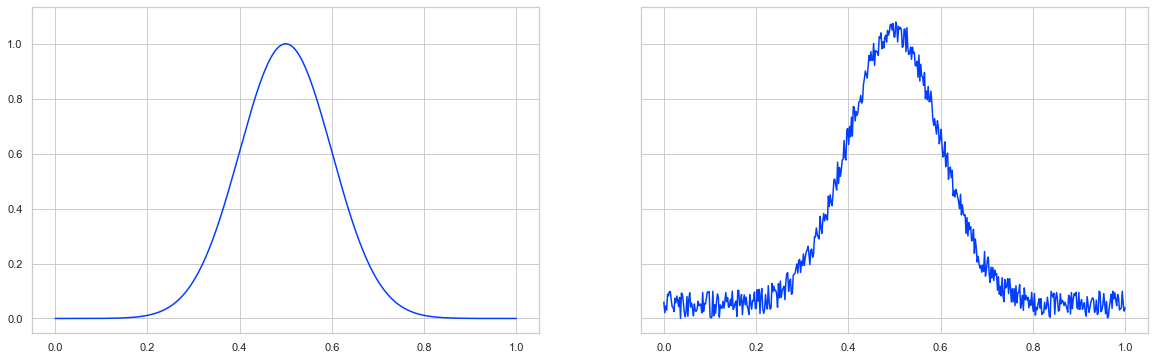

In [74]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex=True, sharey=True)
axs[0].plot(signal_1["Time"],signal_1['Value'])
axs[1].plot(signal_2["Time"],signal_2['Value'])
table = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table.add_row(['Time Series','Multi Sines 1','Multi Sines 2',wasserstein_distance(s,s2),jaccard(signal_1,signal_2)])
print(table)

+-------------+---------------+---------------+--------------------+---------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |       Jaccard       |
+-------------+---------------+---------------+--------------------+---------------------+
|    Freq_R   | Multi Sines 1 | Multi Sines 2 | 0.4154383206107657 |  0.9960238568588469 |
|    Freq_I   | Multi Sines 1 | Multi Sines 2 | 0.3680957399508366 | 0.10816777041942605 |
+-------------+---------------+---------------+--------------------+---------------------+


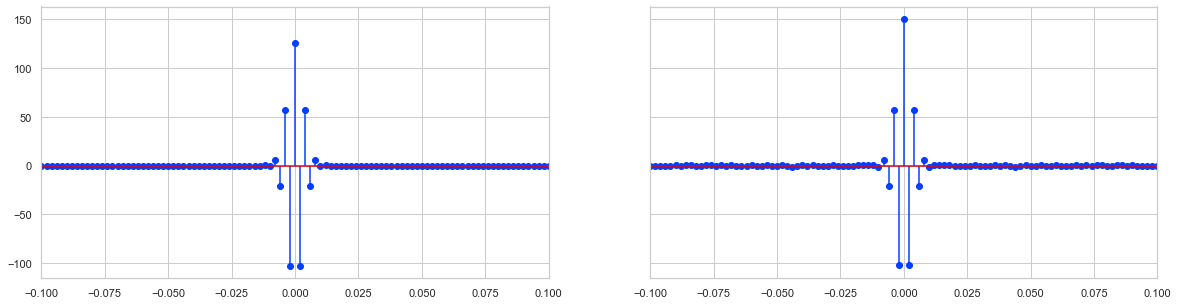

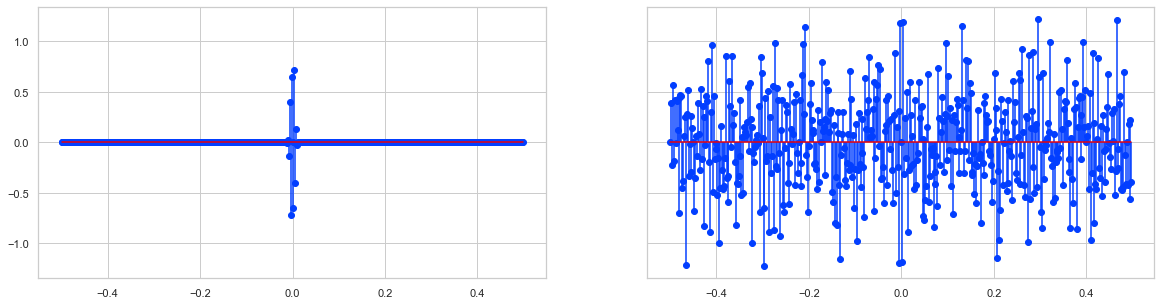

In [81]:
fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1['Freq'], freq_ampli1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli2['Freq'], freq_ampli2['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli1i['Freq'], freq_ampli1i['Ampli'])
axs[1].stem(freq_ampli2i['Freq'], freq_ampli2i['Ampli'])

table2 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table2.add_row(['Freq_R','Multi Sines 1','Multi Sines 2',0.4154383206107657,0.9960238568588469])
table2.add_row(['Freq_I','Multi Sines 1','Multi Sines 2',0.3680957399508366,0.10816777041942605])
print(table2)

+-------------+---------------+---------------+--------------------+---------------------+
| Signal Type |    Signal 1   |    Signal 2   |        EMD         |       Jaccard       |
+-------------+---------------+---------------+--------------------+---------------------+
|   Freq_Mag  | Multi Sines 1 | Multi Sines 2 | 0.6158781145201881 |  0.9960238568588469 |
|  Freq_Phase | Multi Sines 1 | Multi Sines 2 | 0.7705849353463816 | 0.31758530183727035 |
+-------------+---------------+---------------+--------------------+---------------------+


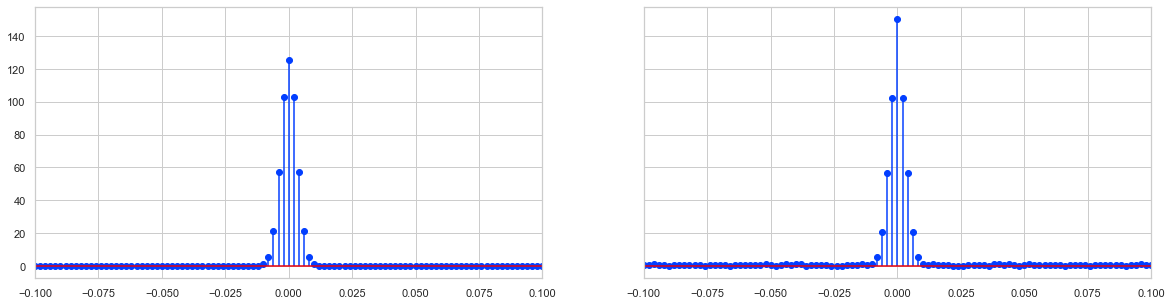

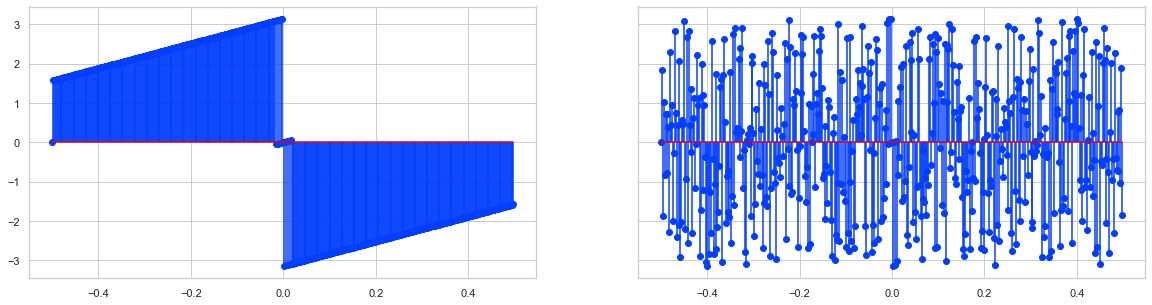

In [82]:
fig, axs = plt.subplots(1,2,figsize=(20,5), sharex=True, sharey=True)
axs[0].stem(freq_ampli_mag1['Freq'], freq_ampli_mag1['Ampli'])
axs[0].set_xlim(-0.1, 0.1)
axs[1].stem(freq_ampli_mag2['Freq'], freq_ampli_mag2['Ampli'])
axs[1].set_xlim(-0.1, 0.1)

fig, axs = plt.subplots(1,2,figsize=(20,5),sharex=True, sharey=True)
axs[0].stem(freq_ampli_phase1['Freq'], freq_ampli_phase1['Phase'])
axs[1].stem(freq_ampli_phase2['Freq'], freq_ampli_phase2['Phase'])

table3 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table3.add_row(['Freq_Mag','Multi Sines 1','Multi Sines 2',0.6158781145201881,0.9960238568588469])
table3.add_row(['Freq_Phase','Multi Sines 1','Multi Sines 2',0.7705849353463816,0.31758530183727035])
print(table3)

+-------------+---------------+---------------+---------------------+-----------+
| Signal Type |    Signal 1   |    Signal 2   |         EMD         |  Jaccard  |
+-------------+---------------+---------------+---------------------+-----------+
|   Cepstrum  | Multi Sines 1 | Multi Sines 2 | 0.09307363656616008 | 0.9609375 |
+-------------+---------------+---------------+---------------------+-----------+


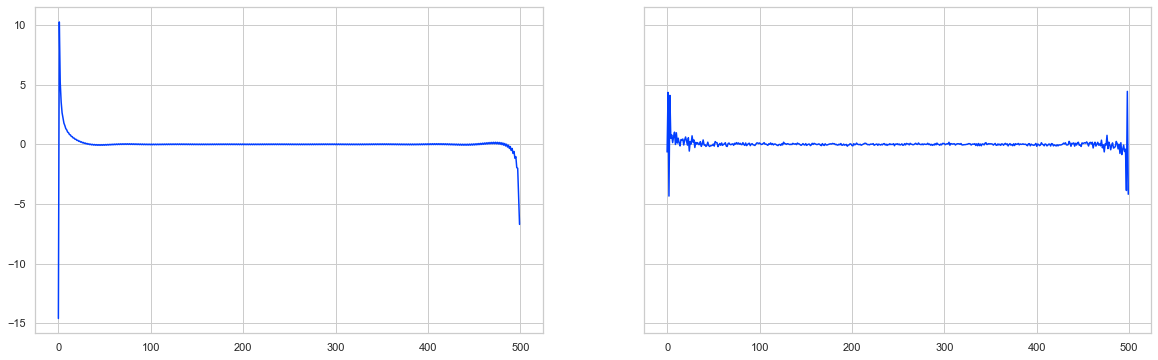

In [83]:
fig, axs = plt.subplots(1,2,figsize=(20,6), sharex = True, sharey = True)
axs[0].plot(ceps1)
axs[1].plot(ceps2)
table4 = PrettyTable(['Signal Type','Signal 1','Signal 2','EMD','Jaccard'])
table4.add_row(['Cepstrum','Multi Sines 1','Multi Sines 2',wasserstein_distance(ceps1,ceps2),jaccard(cepstrum1,cepstrum2)])
print(table4)